<a href="https://colab.research.google.com/github/bomiiisong/AI_Project/blob/master/Modeling/k_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Reference : https://towardsdatascience.com/image-clustering-using-k-means-4a78478d2b83

* Google Drive Mount

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* Dataset Check

In [2]:
!ls -l '/content/drive/My Drive/AI_team3/img_kmeans.zip'

-rw------- 1 root root 51734047 Apr 21 07:50 '/content/drive/My Drive/AI_team3/img_kmeans.zip'


* Unzip File

In [ ]:
!unzip '/content/drive/My Drive/AI_team3/img_kmeans.zip'

* Import Packages

In [4]:
from keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
import keras
import tensorflow
from tqdm import tqdm
import os
import shutil

* Function to Extract features from the images

In [5]:
# Function to Extract features from the images
def image_feature(direc):
    model = VGG16(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='/content/data'+'/'+i
        img=image.load_img(fname,target_size=(640, 640, 3))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

* Load image path for Extract Features

In [6]:
img_path=os.listdir('/content/data')
img_features,img_name=image_feature(img_path)

58892288/58889256 [==============================] - 2s 0us/step


100%|██████████| 544/544 [02:40<00:00,  3.39it/s]


* Cluster Model

In [7]:
%%time

#Creating Clusters
k = 2
clusters = KMeans(k, 
                  random_state = 2045, 
                  init = 'k-means++',
                  max_iter = 500)
clusters.fit(img_features)

CPU times: user 42.1 s, sys: 2.73 s, total: 44.8 s
Wall time: 39.5 s


* Create dataframe with result of clustering

In [ ]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = clusters.labels_
image_cluster # 0 denotes cat and 1 denotes dog

,image,clusterid
0,489.jpg,1
1,6.jpg,0
2,400.jpg,1
3,330.jpg,0
4,97.jpg,0
...,...,...
539,102.jpg,1
540,53.jpg,1
541,498.jpg,0
542,328.jpg,0


* Feature to Vector

In [ ]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=2045)

tsne_vector = tsne.fit_transform(img_features)

CPU times: user 2min 21s, sys: 115 ms, total: 2min 21s
Wall time: 2min 18s


In [ ]:
tsne_vector.shape

(544, 2)

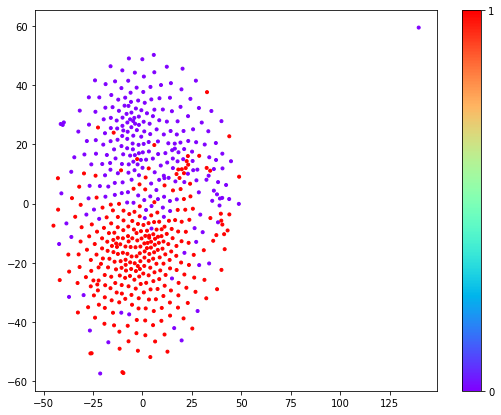

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
fig = plt.scatter(tsne_vector[:, 0],
                  tsne_vector[:, 1],
                  marker='.',
                  c = clusters.labels_,
                  cmap='rainbow')
cb = plt.colorbar(fig, ticks=range(10))

plt.show()

# Clustering 결과 저장 - 오류 수정

* Make folder to seperate images

In [ ]:
# Made folder to seperate images
os.mkdir('/content/drive/MyDrive/best')  # 정확한 폴더 생성 경로 지정
os.mkdir('/content/drive/MyDrive/worst')

In [ ]:
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==1:
        # print(image_cluster['image'])
        shutil.move(os.path.join('/content/imgs', image_cluster['image'][i]), '/content/drive/MyDrive/best')
    else:
        # print(image_cluster['image'])
        shutil.move(os.path.join('/content/imgs', image_cluster['image'][i]), '/content/drive/MyDrive/worst')

* Best Cluster Visualization

In [ ]:
import pathlib
from glob import glob

data_root = pathlib.Path(glob('/content/drive/MyDrive/best')[0])
print(data_root)
# label = ['0','1']

/content/drive/MyDrive/best


In [ ]:
import random

all_image_paths = list(data_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths]

# all_image_paths
random.choice(all_image_paths)

'/content/drive/MyDrive/best/96.jpg'

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt

image_count = len(all_image_paths)
print('image_count:', image_count)

plt.figure(figsize=(12,12))
for n in range(15):
  image_path = random.choice(all_image_paths)
  plt.subplot(5,3, n+1)
  plt.imshow(plt.imread(image_path))
  idx = image_path.split('/')[-2]
  plt.title(str(idx)) # 1 -> Best , 0 -> Worst
  plt.axis('off')
plt.show()

* Worst Cluster Visualization

In [ ]:
worst_data_root = pathlib.Path(glob('/content/drive/MyDrive/worst')[0])
print(worst_data_root)

worst_image_paths = list(worst_data_root.glob('*'))
worst_image_paths = [str(path) for path in worst_image_paths]

random.choice(worst_image_paths)

/content/drive/MyDrive/worst


'/content/drive/MyDrive/worst/157.jpg'

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt

image_num = len(worst_image_paths)
print('image_count:', image_num)

plt.figure(figsize=(12,12))
for n in range(15):
  img_path = random.choice(worst_image_paths)
  plt.subplot(5,3, n+1)
  plt.imshow(plt.imread(img_path))
  idx = img_path.split('/')[-2]
  plt.title(str(idx)) # 1 -> Best , 0 -> Worst
  plt.axis('off')
plt.show()